<a href="https://colab.research.google.com/github/michele25-10/MachineLearning-Python/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [120]:
df = load_diabetes(as_frame=True, scaled=True)
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [121]:
X = np.array(df['data'])
y = df['target']

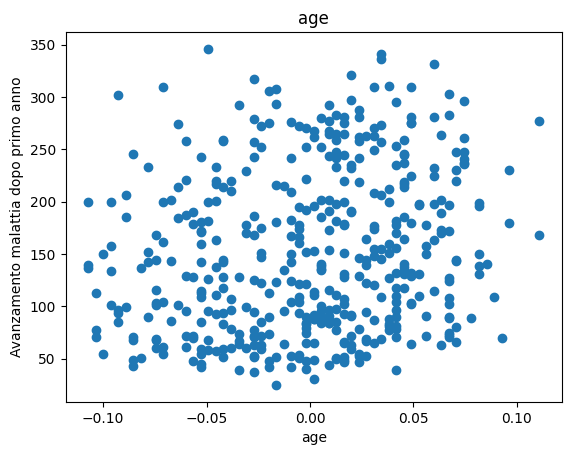

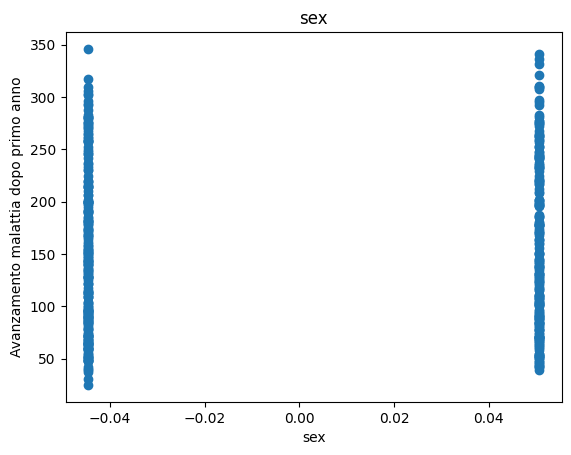

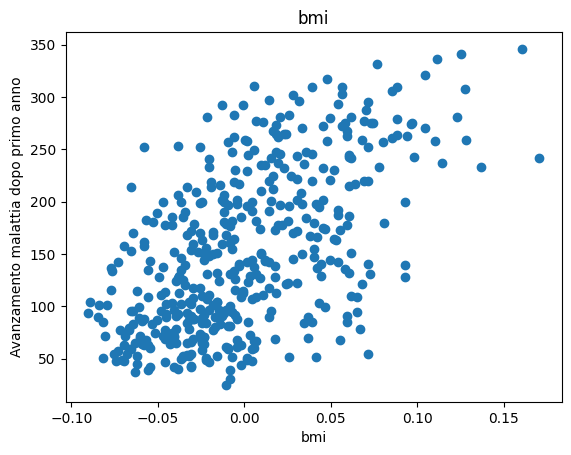

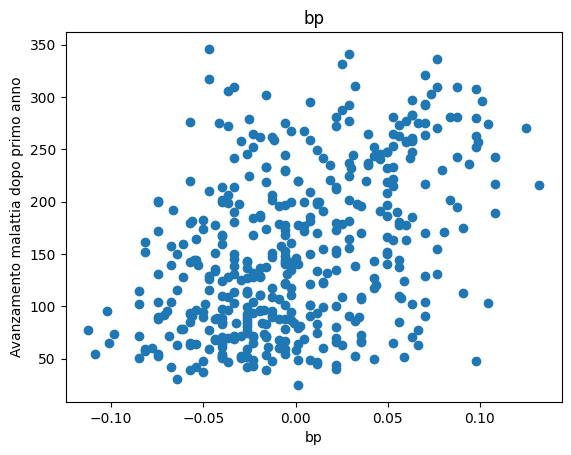

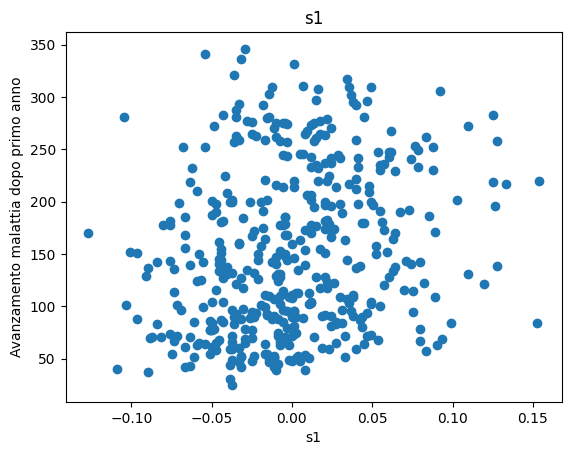

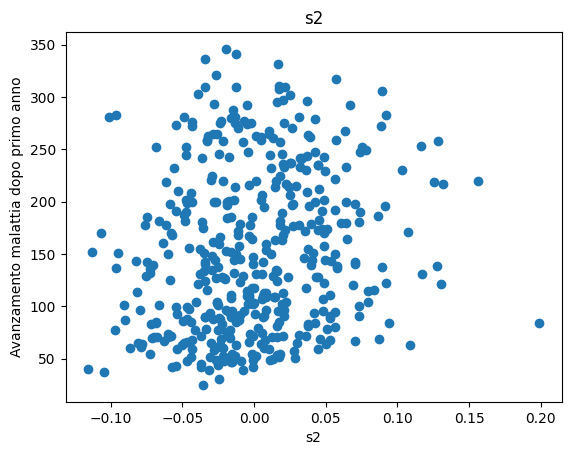

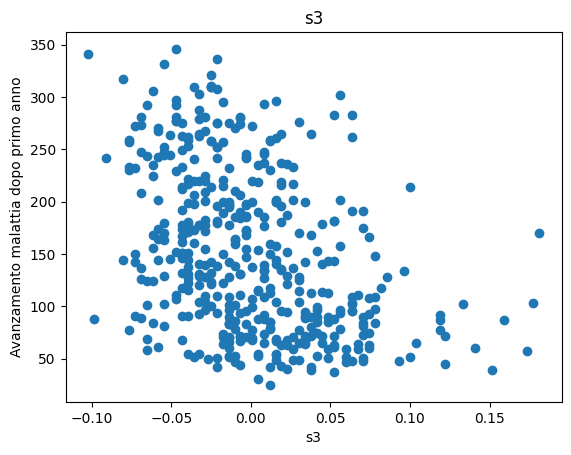

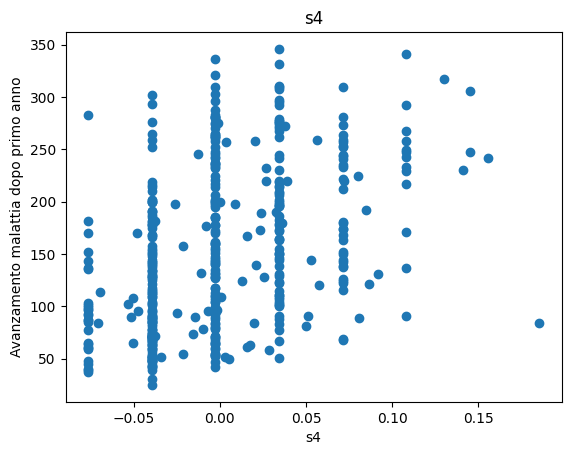

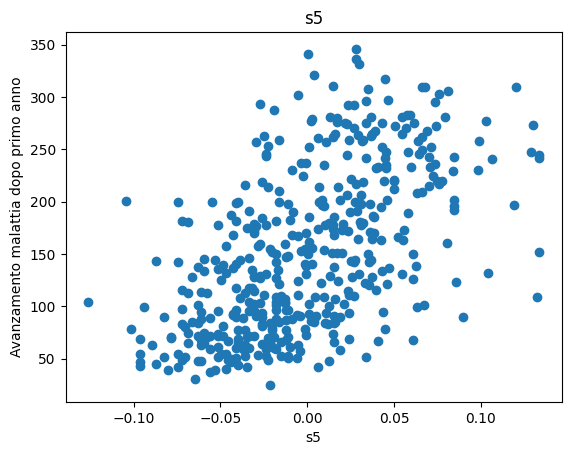

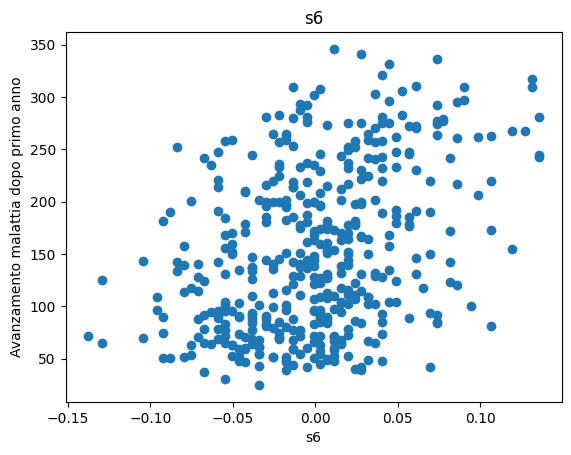

In [122]:
index = 0
for label in df.feature_names:
  plt.scatter(X[:, index], y)
  plt.title(label)
  plt.ylabel("Avanzamento malattia dopo primo anno")
  plt.xlabel(label)
  plt.show()
  index += 1

In [123]:
#Elimino colonna del sex perchè non mi da abbastanza informazioni riguardo a possibili correlazioni
np.delete(X, 1, 1)

array([[ 0.03807591,  0.06169621,  0.02187239, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.05147406, -0.02632753, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.04445121, -0.00567042, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844, -0.01590626,  0.01729339, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248,  0.03906215,  0.00121528, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.0730303 , -0.08141314, ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Provo algoritmo addestramento SGDRegressor

In [125]:
model = SGDRegressor()
model.fit(X_train, y_train)

p_train = model.predict(X = X_train)
p_test = model.predict(X = X_test)

mae = mean_absolute_error(y_test, p_test)
mse = mean_squared_error(y_test, p_test)
print("mae: ", str(mae), "\nmse ", str(mse))

mae:  46.84957059861495 
mse  3300.38415427479


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#Provo Algoritmo kNeighbours

In [126]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

p_train = model.predict(X = X_train)
p_test = model.predict(X = X_test)

mae = mean_absolute_error(y_test, p_test)
mse = mean_squared_error(y_test, p_test)
print("mae: ", str(mae), "\nmse ", str(mse))

mae:  48.29189189189191 
mse  3702.516036036037


#Provo algoritmo LinearRegression

In [127]:
model = LinearRegression()
model.fit(X_train, y_train)

p_train = model.predict(X = X_train)
p_test = model.predict(X = X_test)

mae = mean_absolute_error(y_test, p_test)
mse = mean_squared_error(y_test, p_test)
print("mae: ", str(mae), "\nmse ", str(mse))

mae:  41.55443783279577 
mse  2637.8695258802245


# Algoritmo Migliore

L'algoritmo migliore è quello lineare perchè tra tutti ha gli errori più bassi per quanto riguarda il p_test e y_test rispetto al modello di train.